In [ ]:
# Import the required liabraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Create a fucntion to built CNN model with passing different filter sizes
def create_cnn(filter_size):
    model = models.Sequential([
        layers.Conv2D(32, filter_size, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, filter_size, activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    return model

In [ ]:
train_images.shape

(50000, 32, 32, 3)

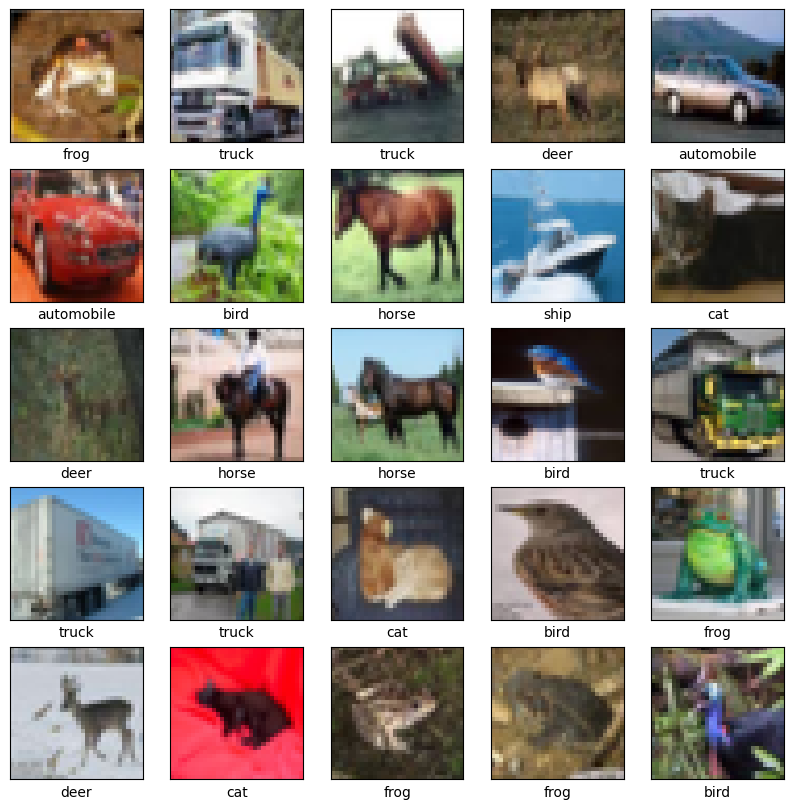

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
filter_sizes = [(3, 3), (5, 5), (7, 7)]
histories = []

for filter_size in filter_sizes:
    print(f"Training model with filter size: {filter_size}")
    model = create_cnn(filter_size)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
    histories.append(history)

Training model with filter size: (3, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3948 - loss: 1.6623 - val_accuracy: 0.5821 - val_loss: 1.1688
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6110 - loss: 1.1097 - val_accuracy: 0.6142 - val_loss: 1.0985
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6677 - loss: 0.9519 - val_accuracy: 0.6758 - val_loss: 0.9343
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7049 - loss: 0.8482 - val_accuracy: 0.6591 - val_loss: 0.9746
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7278 - loss: 0.7780 - val_accuracy: 0.6819 - val_loss: 0.9325
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7546 - loss: 0.7137 - val_accuracy: 0.6930 - val_loss: 0.9033
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7716 - loss: 0.6552 - val_accuracy: 0.6781 - val_loss: 0.9730
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7860 - loss: 0.6142

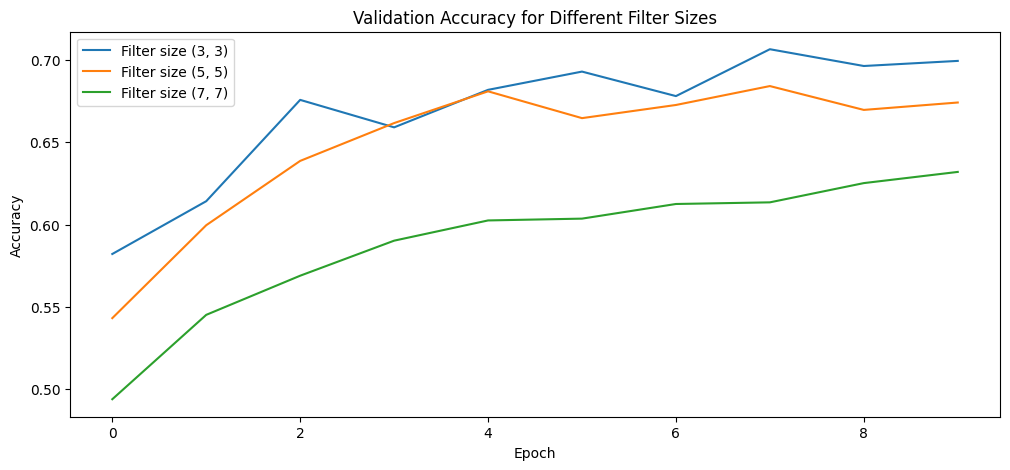

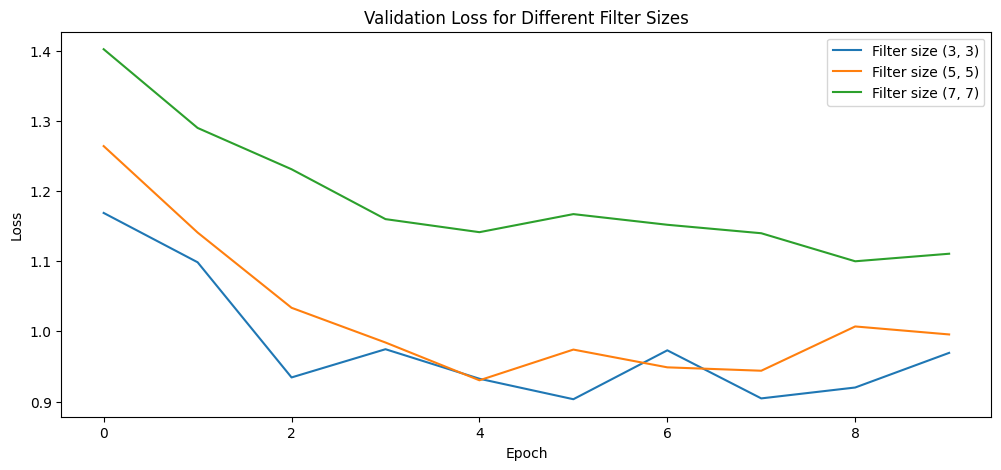

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Filter size {filter_sizes[i]}')
plt.title('Validation Accuracy for Different Filter Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('validation_accuracy.png')
plt.show()

# Plot loss
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Filter size {filter_sizes[i]}')
plt.title('Validation Loss for Different Filter Sizes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('validation_loss.png')
plt.show()